<a href="https://colab.research.google.com/github/Luancg248/Luancg248/blob/main/Mango%2CPalta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
from google.colab import files
uploaded = files.upload()

Saving Fruta.zip to Fruta.zip


In [95]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['Fruta.zip']), 'r')
data.extractall()

In [96]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
pandas_folder_path="/content/Mangot"
Mangot=[]
img_size=150
for img in os.listdir(pandas_folder_path):
    img = cv2.imread(os.path.join(pandas_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    Mangot.append(img_resize)

In [97]:
Mango = np.array(Mangot)
print(Mango.shape)

(136, 150, 150, 3)


In [98]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
pandas_folder_path="/content/palta"
palta=[]
img_size=150
for img in os.listdir(pandas_folder_path):
    img = cv2.imread(os.path.join(pandas_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    palta.append(img_resize)

In [99]:
paltat = np.array(palta)
print(paltat.shape)

(44, 150, 150, 3)


(150, 150, 3)


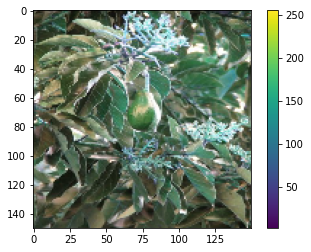

In [105]:
print(paltat[6].shape)
plt.figure()
plt.imshow(np.squeeze(paltat[6]))
plt.colorbar()
plt.grid(False)
plt.show()

(150, 150, 3)


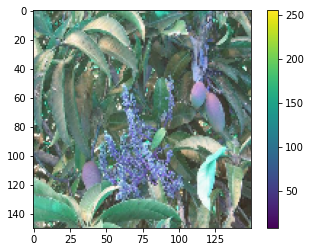

In [104]:
print(Mango[75].shape)
plt.figure()
plt.imshow(np.squeeze(Mango[75]))
plt.colorbar()
plt.grid(False)
plt.show()

# **¡Nuevo!**

In [108]:
images = np .concatenate([Mango,paltat])
print(len(images))
Images = np.array(images)
print(Images.shape)

180
(180, 150, 150, 3)


In [109]:
etiquetas_Mango = np.repeat(0,136)
print(len(etiquetas_Mango))
print(etiquetas_Mango)

136
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [110]:
etiquetas_palta = np.repeat(1,44)
print(len(etiquetas_palta))
print(etiquetas_palta)

44
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [112]:
class_names=['Mango','Palta']

In [113]:
labels = np.concatenate([etiquetas_Mango,etiquetas_palta])
print(len(labels))
print(labels)
Labels = np.array(labels)
print(Labels.shape)


180
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(180,)


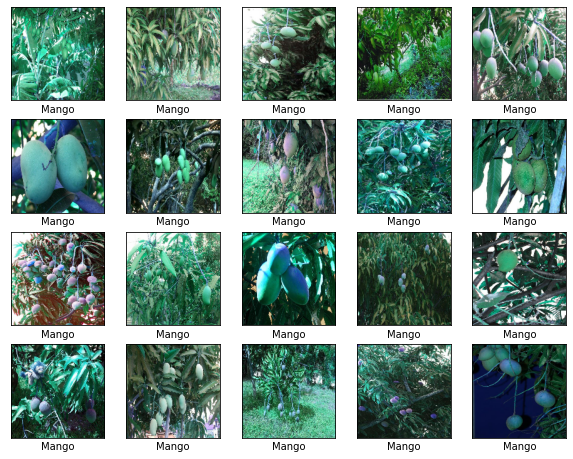

In [114]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Images[i])
    #, cmap=plt.cm.binary
    plt.xlabel(class_names[Labels[i]])
plt.show()

In [115]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.9.2


In [116]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(2, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels, epochs=30)
trained=model.fit(Images, Labels, epochs=30)

Epoch 1/30
6/6 [==============================] - 0s 34ms/step - loss: 2643.0166 - accuracy: 0.6000
Epoch 2/30
6/6 [==============================] - 0s 34ms/step - loss: 1066.2748 - accuracy: 0.6556
Epoch 3/30
6/6 [==============================] - 0s 34ms/step - loss: 356.9538 - accuracy: 0.7389
Epoch 4/30
6/6 [==============================] - 0s 33ms/step - loss: 358.3230 - accuracy: 0.7444
Epoch 5/30
6/6 [==============================] - 0s 32ms/step - loss: 541.6011 - accuracy: 0.7000
Epoch 6/30
6/6 [==============================] - 0s 53ms/step - loss: 161.2924 - accuracy: 0.8278
Epoch 7/30
6/6 [==============================] - 0s 33ms/step - loss: 202.1322 - accuracy: 0.8000
Epoch 8/30
6/6 [==============================] - 0s 34ms/step - loss: 77.4223 - accuracy: 0.9278
Epoch 9/30
6/6 [==============================] - 0s 33ms/step - loss: 65.5700 - accuracy: 0.9167
Epoch 10/30
6/6 [==============================] - 0s 35ms/step - loss: 18.2944 - accuracy: 0.9667
Epoch 11/3

In [120]:
img=Images[100]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


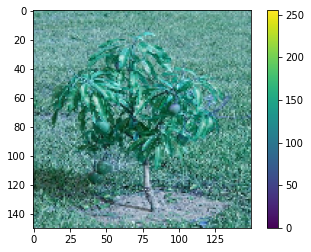

In [121]:
plt.figure()
plt.imshow(Images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [122]:
predictions_single = model.predict(img)
print(predictions_single)
print(np.sum( predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])

1/1 [==============================] - 0s 16ms/step
[[1. 0.]]
1.0
0
Mango


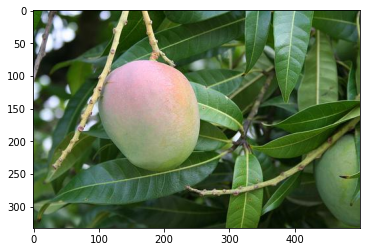

In [131]:
import cv2
img= cv2.imread("imgma.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [132]:
img2=img_cvt
img2=cv2.resize(img2,(img_size,img_size))
print(img2.shape)
img2 = (np.expand_dims(img2,0))
print(img2.shape)


(150, 150, 3)
(1, 150, 150, 3)


In [133]:
predictions_single = model.predict(img2)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])


1/1 [==============================] - 0s 24ms/step
[[1. 0.]]
1.0
0
Mango


# Nueva sección

# Nueva sección